In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


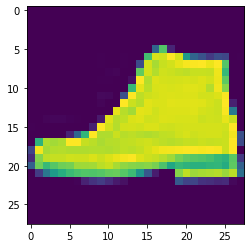

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[42])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [14]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 4.4145
Epoch 2/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5222
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.5073
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4969
Epoch 5/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4892


In [15]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print('Reached 60% acc, stopping')
            self.model.stop_training = True

In [16]:
model.fit(train_images, train_labels, epochs=5, callbacks=[CustomCallback()])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4662
Epoch 2/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4664
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4575
Epoch 4/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4551
Epoch 5/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4549


In [19]:
print(model.evaluate(test_images,  test_labels, verbose=2))

10000/10000 - 1s - loss: 0.5071
0.5071219379663467


In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([0.08616482, 0.08616482, 0.08616482, 0.08616482, 0.08616482,
       0.08769123, 0.08616482, 0.09082826, 0.08616485, 0.21832678],
      dtype=float32)

In [23]:
np.argmax(predictions[0])

9

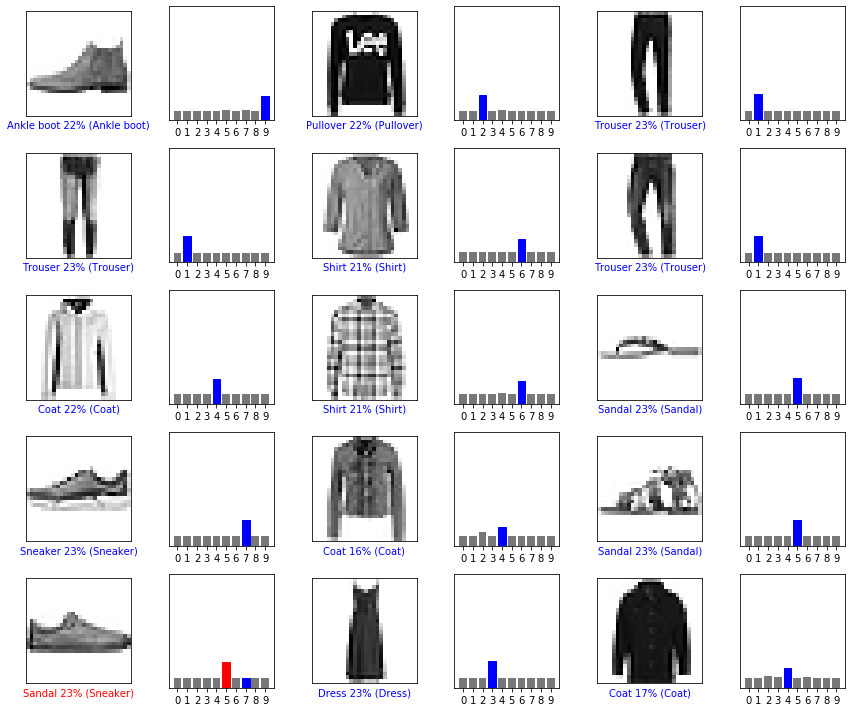

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()